# <center>Projet Finance Preprocessing</center>

## <center>Load "P3_Loan prediction"</center>

## Import Librairies

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# TrainTest - Nettoyage - Encodage
from sklearn.model_selection import train_test_split

# Equilibrage des données
from imblearn.over_sampling import SMOTE

# Classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Modélisation &split de données
from sklearn.model_selection import train_test_split
# KNN :
from sklearn.neighbors import KNeighborsClassifier
# SVC :
from sklearn.svm import SVC
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# DecisionTreeClassifier :
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Mean_squared_error :
from sklearn.metrics import mean_squared_error
# Cross_val_score :
from sklearn.model_selection import cross_val_score
# K-Best & F1_score :
from sklearn.feature_selection import SelectKBest, f_classif


# Scoring modèles
from sklearn.metrics import *

## Import dataset de base 

In [173]:
dfbase = pd.read_csv("csv/train.csv")
dfbase.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Import dataset clean :
Celui dont on va se servir 

In [174]:
dfclean = pd.read_csv("csv/dfclean.csv")
dfclean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Analyse de la forme de nos données

In [175]:
df = dfclean.copy()

In [176]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [345]:
# On assigne une signification à 0 et 1 soit notre présente valeur Y or N :
def emprunt_type(row):
    if row['Loan_Status'] == 0:
        return 'pas emprunt'
    elif row['Loan_Status'] == 1:
        return 'emprunt'

In [347]:
df['Loan_Status'] = df.apply(emprunt_type, axis=1)

In [348]:
df['Loan_Status']

0      pas emprunt
1          emprunt
2          emprunt
3          emprunt
4          emprunt
          ...     
475        emprunt
476        emprunt
477        emprunt
478        emprunt
479    pas emprunt
Name: Loan_Status, Length: 480, dtype: object

## Assignation des variables X = toutes les features et y = target

In [349]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

## Train-Test

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

## Modèles

## KNN

In [368]:
knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train, y_train)
knn_predictions = knn_clf.predict(X_test)
print('Accuracy score  of the knn : {}'.format(accuracy_score(y_test, knn_predictions)))

Accuracy score  of the knn : 0.671875


In [362]:
print("Wrong predictions out of total")
print((y_test != knn_predictions).sum(), '/', (y_test == knn_predictions).sum() + (y_test != knn_predictions).sum())
print("Percentage accuracy : ", 100 * accuracy_score(y_test, knn_predictions))

Wrong predictions out of total
126 / 384
Percentage accuracy :  67.1875


In [363]:
confusion_matrix(y_test, knn_predictions)

array([[251,  12],
       [114,   7]], dtype=int64)

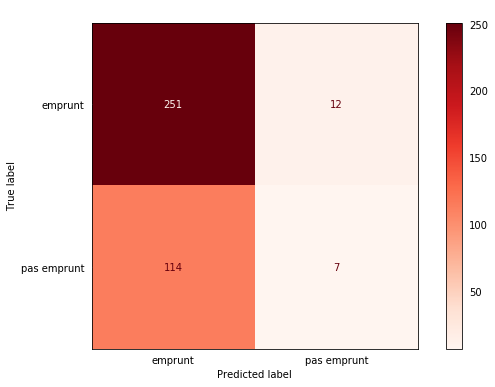

In [357]:
matrix = plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='white')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [382]:
def evaluation(knn_clf):
    knn_clf = KNeighborsClassifier(n_neighbors=9)
    knn_clf.fit(X_train, y_train)
    knn_predictions = knn_clf.predict(X_test)

    print(confusion_matrix(y_test, knn_predictions))
    print(classification_report(y_test, knn_predictions))

In [383]:
evaluation(knn_clf)

[[251  12]
 [114   7]]
              precision    recall  f1-score   support

     emprunt       0.69      0.95      0.80       263
 pas emprunt       0.37      0.06      0.10       121

    accuracy                           0.67       384
   macro avg       0.53      0.51      0.45       384
weighted avg       0.59      0.67      0.58       384



## SMOTE

In [246]:
# On fait un SMOTE pour réhausser nos valeurs négatives, qui sont moindres comparées à nos valeurs positifs :
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df[['Married', 'Education', 'Self_Employed',                                                  'ApplicantIncome', 'CoapplicantIncome',                                                     'LoanAmount']], 
                                      df['Loan_Status'])
y_smote.value_counts()

1    332
0    332
Name: Loan_Status, dtype: int64

## RandomForestClassifier & SMOTE

Metrics accuracy_score :

In [293]:
X_train, X_test, y_train, y_testrdsm = train_test_split(X_smote, y_smote, train_size=0.8, random_state=0, shuffle=False)
random = RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1)
random.fit(X_train, y_train)
resultrdsmote = random.predict(X_test)

In [276]:
print("Wrong predictions out of total")
print((y_testrdsm != resultrdsmote).sum(), '/', (y_testrdsm == resultrdsmote).sum() + (y_testrdsm != resultrdsmote).sum())
print("Percentage accuracy : ", 100 * accuracy_score(y_testrdsm, resultrdsmote))

Wrong predictions out of total
133 / 133
Percentage accuracy :  0.0


### RandomForestClassifier

Metrics accuracy_score :

In [287]:
X_train, X_test, y_train, y_testRF = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=False)
random = RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1)
random.fit(X_train, y_train)
resultrandom = random.predict(X_test)

In [288]:
print("Wrong predictions out of total")
print((y_testRF != resultrandom).sum(), '/', (y_testRF == resultrandom).sum() + (y_test != resultrandom).sum())
print("Percentage accuracy : ", 100 * accuracy_score(y_testRF, resultrandom))

Wrong predictions out of total
26 / 99
Percentage accuracy :  72.91666666666666


### PCA

In [328]:
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
X
# réduction
data = pd.DataFrame(scale(X),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)
resultPCA = pd.DataFrame(C)
resultPCA

,0,1,2,3,4,5,6,7,8,9,10
0,0.487101,-0.525655,0.349260,0.478490,-1.242624,-0.309010,0.407864,-0.691498,-0.003337,-0.375069,0.245752
1,-0.123306,0.010016,-0.447625,-0.202307,-0.617814,1.818646,-1.417465,-1.318263,-1.167298,-0.725958,0.219906
2,-0.399185,-1.443014,-0.088680,0.460480,-0.407006,0.099119,-0.526347,1.560608,-0.144320,-0.856147,0.187129
3,-0.918762,0.712723,0.212577,0.072137,-0.650460,-0.061233,0.616983,0.163131,-0.908534,0.700018,-0.379708
4,2.375235,0.599912,0.256080,0.355198,-0.118142,1.653930,-1.447122,-0.642845,0.590745,0.171490,-0.687323
...,...,...,...,...,...,...,...,...,...,...,...
475,-2.432406,1.041379,-0.325512,0.393696,-0.957218,-0.060950,0.789204,-0.806764,1.140756,-0.249314,0.236265
476,0.985251,-2.167722,-1.221809,-0.753532,-0.531591,0.244646,1.857986,-1.828333,0.793875,0.723920,0.437602
477,1.293272,0.484775,0.409758,-0.439994,-0.654533,-0.525846,0.353410,0.204578,-0.228487,-0.473881,-0.610360
478,1.278029,-0.096003,0.172936,-0.808669,-0.791179,-0.725066,0.107112,-0.322616,0.137433,0.163252,-0.180651


In [213]:
# On voit ici le % de variance expliqué par chacun des axes PCA
# Avec les 2 premiers on atteint quasi 90 %
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)

# Matrice des coefficients de corrélation linéaire entre les variables initiales et les facteurs
# En colonne les variables initiales et en lignes les axes PCA
print("Composantes principales : ")
pd.DataFrame(pca.components_)

Pourcentage de variance expliquée : 
[0.17621771 0.13507616 0.10866839 0.09706544 0.0897776  0.08702909
 0.07931592 0.07331044 0.0653711  0.05145108 0.03671706]
Composantes principales : 


,0,1,2,3,4,5,6,7,8,9,10
0,-0.374948,0.458877,0.436483,0.099082,0.165968,0.374625,0.174429,0.481218,-0.108859,-0.039240,-0.072356
1,0.378612,-0.346193,-0.227957,0.378127,0.224071,0.491647,-0.099256,0.394673,0.281915,-0.058436,0.037762
2,-0.104557,0.114359,-0.135103,0.455060,-0.323943,-0.243746,0.521368,0.094481,0.333896,0.355401,0.260305
3,-0.157872,-0.200869,-0.248442,-0.119200,0.062340,-0.123561,0.516335,0.107629,0.122921,-0.395960,-0.624149
4,0.159971,-0.005720,-0.072458,0.027193,0.021637,-0.048443,0.339569,0.047047,-0.396789,-0.591998,0.583222
5,-0.018274,-0.082943,-0.225558,-0.014760,0.678573,-0.069727,0.268658,-0.049480,-0.394830,0.495079,0.027379
6,0.008760,-0.150206,-0.155676,0.264192,-0.525624,0.194547,-0.031227,0.097121,-0.673193,0.165199,-0.279843
7,-0.090443,-0.133367,-0.236850,-0.721066,-0.261936,0.282126,0.147551,0.313196,0.079894,0.244658,0.252366
8,0.720271,0.004933,0.507119,-0.176740,-0.073321,-0.145109,0.292145,0.142687,-0.041618,0.165594,-0.177437
9,-0.334374,-0.722573,0.532176,0.062307,-0.005526,0.099342,0.142228,-0.166816,0.013350,0.041631,0.138283


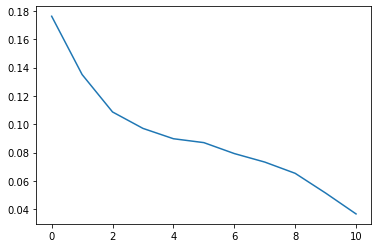

In [214]:
# Eboulis des valeurs propres
# Représentation graphique du taux de variances par axe PCA
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

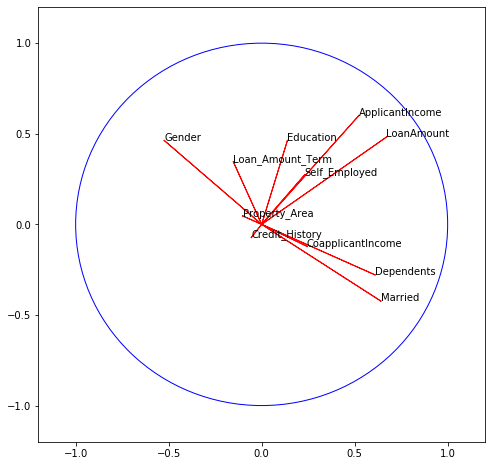

In [215]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

## Decision Tree Classifier :

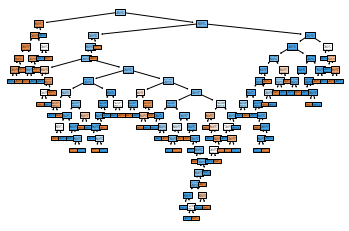

In [307]:
X_train, X_test, y_train, y_testDT = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=False)
dct = DecisionTreeClassifier(random_state=0)
cross_val_score(dct, X, y)
modelDT = dct.fit(X_train, y_train)

# On visualise l'arbre de décision :
graph = tree.plot_tree(modelDT, filled=True)

## Decision Tree Classifier & SMOTE

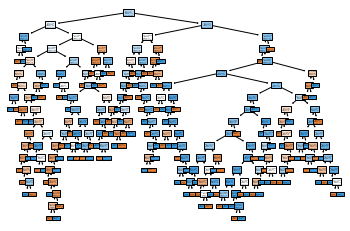

In [308]:
X_train, X_test, y_train, y_testDTsm = train_test_split(X_smote, y_smote, train_size=0.8, random_state=0, shuffle=False)
dct = DecisionTreeClassifier(random_state=0)
cross_val_score(dct, X, y)
modelDT = dct.fit(X_train, y_train)

# On visualise l'arbre de décision :
graph = tree.plot_tree(modelDT, filled=True)